Machine Learning e Data Science com Python de A à Z


# Preprocessamento e importação de dados

## Importanto Bibliotecas Base

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## Base de dados Credito
*   Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset


In [61]:
base_credit = pd.read_csv('/content/credit_data.csv')
base_credit

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## Explorando os Dados

In [62]:
base_credit.head(10)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [63]:
base_credit.tail(10)

,i#clientid,income,age,loan,c#default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [64]:
base_credit.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [65]:
base_credit[base_credit["income"] > 69500]

,i#clientid,income,age,loan,c#default
150,151,69579.929211,57.756243,10868.241472,0
325,326,69958.705541,30.536020,8755.691977,1
346,347,69566.684349,52.967088,9875.037183,0
422,423,69995.685578,52.719673,2084.370861,0
1057,1058,69929.010996,51.394448,12427.835703,0
1350,1351,69592.010828,63.238625,13025.056571,0
1377,1378,69939.329678,55.637621,2225.224533,0
1378,1379,69755.320163,44.543682,13766.051239,0
1610,1611,69695.150449,26.424483,8418.253160,1
1902,1903,69852.058722,62.202313,9246.265058,0


In [66]:
base_credit = base_credit.rename(columns={"c#default" : "default"})
base_credit

,i#clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## Vizualizando os dados

In [67]:
base_credit["default"].unique()

array([0, 1])

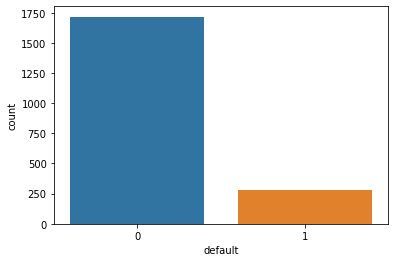

In [68]:
sns.countplot(x = base_credit["default"])
plt.show()

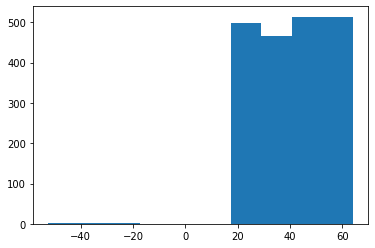

In [69]:
plt.hist(x = base_credit["age"])
plt.show()

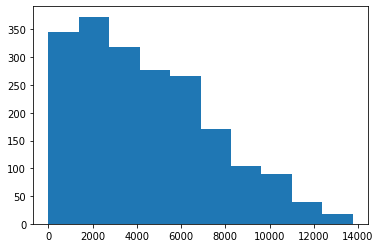

In [70]:
plt.hist(x = base_credit["loan"])
plt.show()

In [71]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color= "default")
grafico.show()
plt.show()

## Preprocessamento

#### Dados *Inconsistentes*

In [72]:
media = base_credit['age'].mean()


In [73]:
# Troca as idades que estão abaixo de zero pela média da coluna "idade"
base_credit.loc[base_credit.age < 0, 'age'] = media


Para testes, usaremos algumas bases diferentes.

In [74]:
base_credit_sem_idade = base_credit.drop("age", axis = 1)

In [75]:
base_credit_sem_idade_menor_zero = base_credit.drop(base_credit[base_credit["age"] < 0].index)

#### Dados Faltantes

In [76]:
base_credit.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
default       0
dtype: int64

In [77]:
base_credit.loc[pd.isnull(base_credit["age"])]

,i#clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [78]:
# Troca as idades nulas pela média
base_credit["age"].fillna(base_credit["age"].mean(), inplace = True)
base_credit.loc[(base_credit["i#clientid"] == 29) | (base_credit["i#clientid"] == 31) | (base_credit["i#clientid"] == 32)]

,i#clientid,income,age,loan,default
28,29,59417.805406,40.92752,2082.625938,0
30,31,48528.852796,40.92752,6155.784670,0
31,32,23526.302555,40.92752,2862.010139,0


## Dividindo os dados entre previssores e classes

In [79]:
X_credit = base_credit.iloc[:, 1:4].values
y_credit = base_credit.iloc[:, 4].values

## Escalonando

In [80]:
from sklearn.preprocessing import StandardScaler # Escalonamento pelo método Padrão

In [81]:
escalar = StandardScaler()
X_credit = escalar.fit_transform(X_credit)
X_credit

array([[ 1.45393393,  1.36539359,  1.20281942],
       [-0.76217555,  0.54267291,  0.69642695],
       [ 0.83682073,  1.67418453,  1.17471147],
       ...,
       [-0.07122592, -0.97447238,  0.35420081],
       [-0.11000289,  1.73938004, -0.92675625],
       [ 1.682986  ,  1.14918907,  0.96381038]])

## Base de Dados Census


*   Fonte: https://archive.ics.uci.edu/ml/datasets/adult



In [82]:
base_census = pd.read_csv('/content/census.csv', error_bad_lines=False)
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualizando Dados

In [84]:
base_census["income"].unique()

array([' <=50K', ' >50K'], dtype=object)

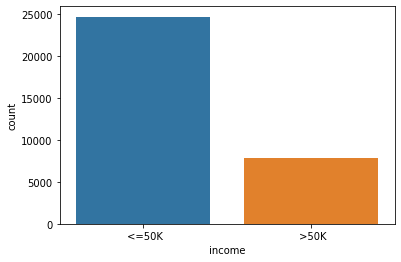

In [85]:
sns.countplot(x = base_census["income"])

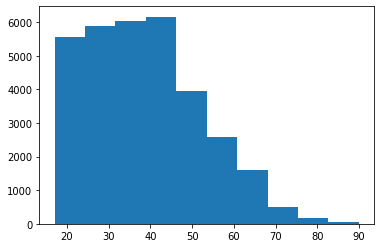

In [86]:
plt.hist(x = base_census["age"])
plt.show()

## Previsores e Classes

In [87]:
X_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values

In [88]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [89]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Trantando atributos categóricos

### LabelEnconder

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
label_enconder = LabelEncoder()

In [92]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [93]:
X_census[:, 1] = label_enconder.fit_transform(X_census[:, 1])
X_census[:, 3] = label_enconder.fit_transform(X_census[:, 3])
X_census[:, 5] = label_enconder.fit_transform(X_census[:, 5])
X_census[:, 6] = label_enconder.fit_transform(X_census[:, 6])
X_census[:, 7] = label_enconder.fit_transform(X_census[:, 7])
X_census[:, 8] = label_enconder.fit_transform(X_census[:, 8])
X_census[:, 9] = label_enconder.fit_transform(X_census[:, 9])
X_census[:, 13] = label_enconder.fit_transform(X_census[:, 13])

In [94]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

### OneHotEnconder

In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [96]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')

X_census = onehotencoder.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

### Escalonamento

In [97]:
X_census = escalar.fit_transform(X_census)
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

## Separando os Dados

In [98]:
from sklearn.model_selection import train_test_split

### Credit_data

In [99]:
X_treino_credit, X_teste_credit, y_treino_credit, y_teste_credit = train_test_split(X_credit,
                                                                                    y_credit,
                                                                                    test_size = .25,
                                                                                    random_state = 0)

### Census

In [100]:
X_treino_census , X_teste_census, y_treino_census, y_teste_census = train_test_split(X_census,
                                                                                     y_census,
                                                                                     test_size = .33,
                                                                                     random_state = 0)

## Salvando as variáveis

In [101]:
import pickle

In [102]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_treino_credit, y_treino_credit, X_teste_credit, y_teste_credit], f)

with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_treino_census, y_treino_census, X_teste_census, y_teste_census], f)

# Classificação

## Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB

### Base Risco Crédito

In [104]:
base_risco_creidto = pd.read_csv('/content/risco_credito.csv')

In [105]:
base_risco_creidto

,historia,divida,garantias,renda,c#risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [106]:
X_risco_credito = base_risco_creidto.iloc[:, 0:4].values
y_risco_credito = base_risco_creidto.iloc[:, 4].values

In [107]:
# Usando LabelEnconder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X_risco_credito[:, 0] = labelencoder.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = labelencoder.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = labelencoder.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = labelencoder.fit_transform(X_risco_credito[:, 3])

In [108]:
import pickle
with open("risco_credito.pkl", "wb") as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [109]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
# história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [111]:
print(naive_risco_credito.classes_)
print(naive_risco_credito.class_count_)
print(naive_risco_credito.class_prior_)

['alto' 'baixo' 'moderado']
[6. 5. 3.]
[0.42857143 0.35714286 0.21428571]


### Base Credito data - 93.80%

In [112]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [113]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [114]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [115]:
naive_credit = GaussianNB()
naive_credit.fit(X_credit_treinamento, y_credit_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
previsoes = naive_credit.predict(X_credit_teste)

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [118]:
accuracy_score(y_credit_teste, previsoes)

0.938

In [119]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [120]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.938

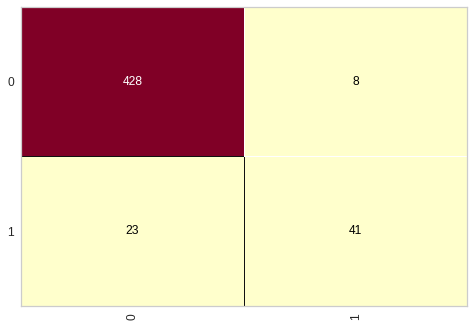

In [121]:
cm = ConfusionMatrix(naive_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [122]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



### Base Census - 79.74%



In [123]:
with open("census.pkl", "rb") as file:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(file)

In [124]:
X_census_treinamento.shape, y_census_treinamento.shape

((21815, 108), (21815,))

In [125]:
X_census_teste.shape, y_census_teste.shape

((10746, 108), (10746,))

In [126]:
naive_census = GaussianNB()

In [127]:
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [128]:
previssoes_census = naive_census.predict(X_census_teste)
previssoes_census

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'],
      dtype='<U6')

In [129]:
accuracy_score(y_census_teste, previssoes_census)

0.4892052856876977

0.4892052856876977

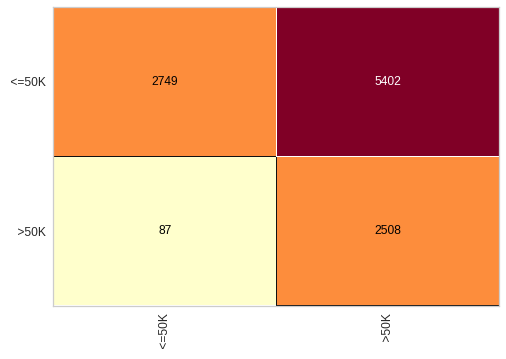

In [130]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [131]:
print(classification_report(y_census_teste, previssoes_census))

              precision    recall  f1-score   support

       <=50K       0.97      0.34      0.50      8151
        >50K       0.32      0.97      0.48      2595

    accuracy                           0.49     10746
   macro avg       0.64      0.65      0.49     10746
weighted avg       0.81      0.49      0.49     10746



## Árvore de Decisão

In [132]:
from sklearn.tree import DecisionTreeClassifier

#### Base Risco Crédito

In [133]:
import pickle
with open("risco_credito.pkl", "rb") as file:
    X_risco_credito, y_risco_credito = pickle.load(file)

In [134]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [148]:
arvores_risco_credito = DecisionTreeClassifier(criterion= "entropy", random_state = 0)

In [149]:
arvores_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [137]:
# Importancia de cada feature
arvores_risco_credito.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

In [138]:
arvores_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

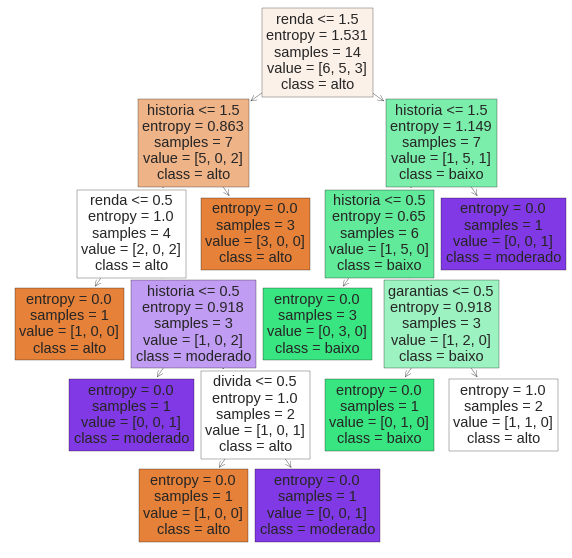

In [139]:
# Vizualiando a árvores
from sklearn import tree
previsores = ["historia", "divida", "garantias", "renda"]
figura, eixos = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
tree.plot_tree(arvores_risco_credito, feature_names = previsores, class_names = arvores_risco_credito.classes_, filled=True)
plt.show()

In [140]:
# história boa, dívida alta, garantias nenhuma, renda > 35
# história ruim, dívida alta, garantias adequada, renda < 15
previsoes = arvores_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

### Base Credito Data - 0.98

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
import pickle
with open("credit.pkl", "rb") as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [147]:
arvores_credito = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvores_credito.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [150]:
previssoes = arvores_credito.predict(X_credit_teste)

0.982

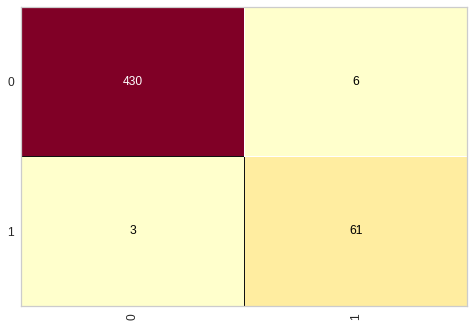

In [152]:
from sklearn.metrics import accuracy_score, classification_report
cm = ConfusionMatrix(arvores_credito)
cm.fit = (X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_teste_credit)


In [153]:
print(classification_report(y_teste_credit, previssoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



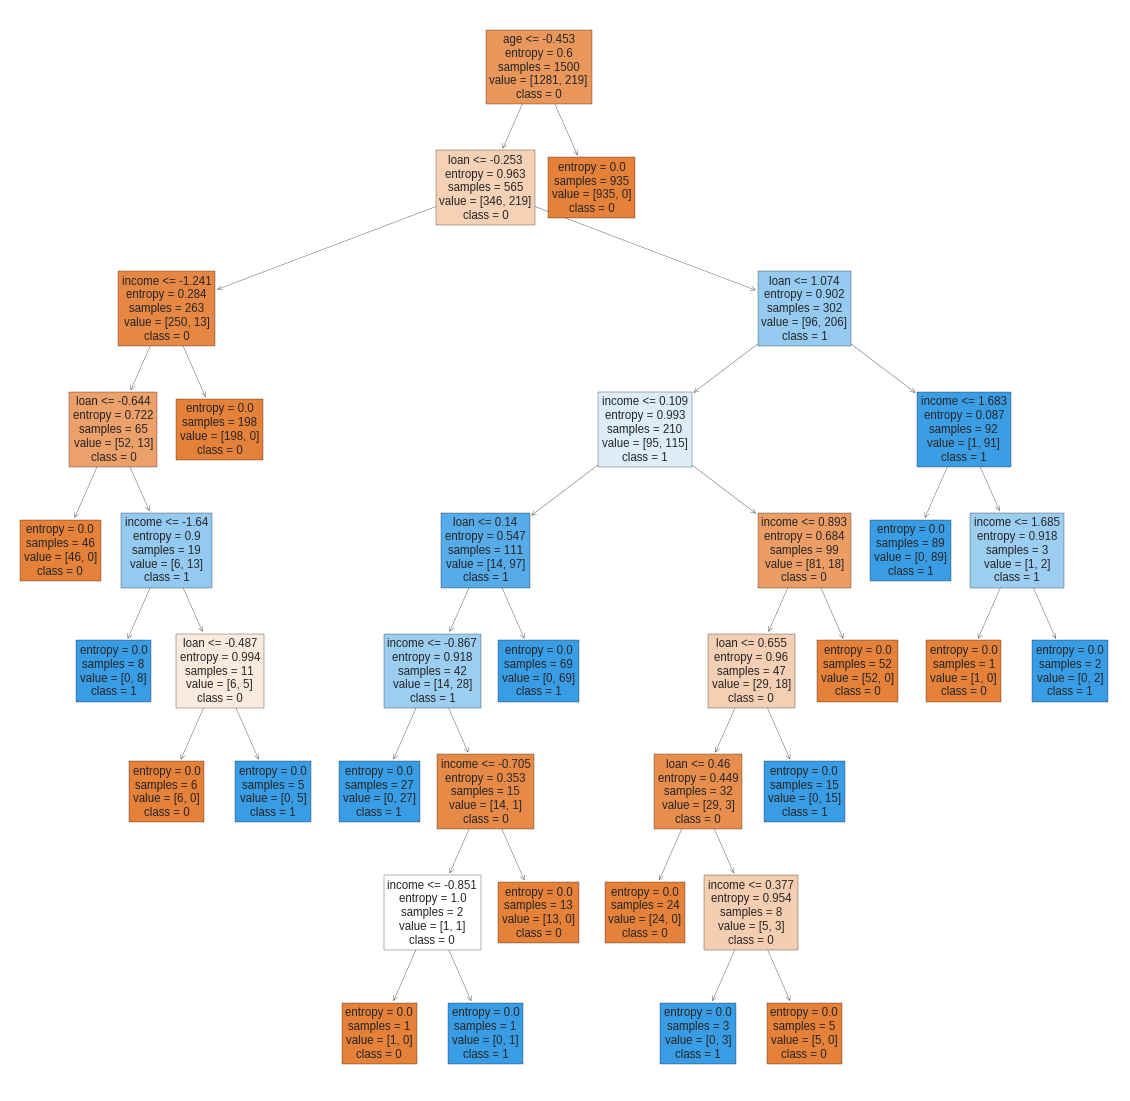

In [154]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(arvores_credito, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credit.png')

### Base Census 81.13%

In [157]:
with open("census.pkl", "rb") as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [166]:
X_census_treinamento.shape

(21815, 108)

In [167]:
X_census_teste.shape

(10746, 108)

In [161]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [163]:
previssoes = arvore_census.predict(X_census_teste)

In [164]:
accuracy_score(y_census_teste, previssoes)

0.8136981202307836

0.8136981202307836

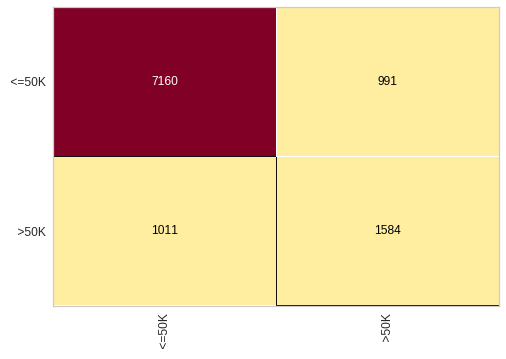

In [165]:
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

## Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

### Base Credit Data - 98.4%



In [171]:
import pickle
with open("credit.pkl", "rb") as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [174]:
forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [179]:
previsoes = forest_credit.predict(X_credit_teste)

In [180]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.984

0.984

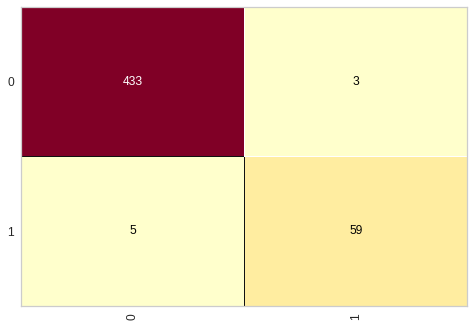

In [181]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [182]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



### Base Census - 85.39%

In [183]:
with open("census.pkl", "rb") as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [184]:
forest_census = RandomForestClassifier(n_estimators=100,
                                       criterion = "entropy",
                                       random_state = 0)

In [186]:
forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [188]:
previsoes = forest_census.predict(X_census_teste)

In [189]:
accuracy_score(y_census_teste, previsoes)

0.8539921831379118

0.8539921831379118

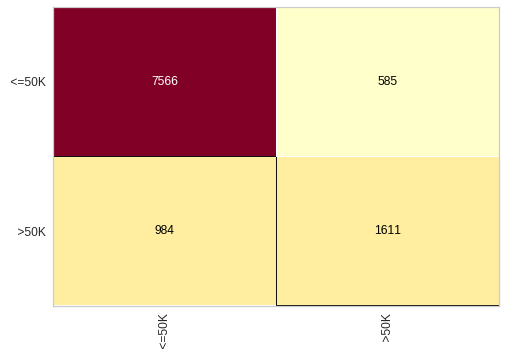

In [191]:
cm = ConfusionMatrix(forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

## Regras

## KNN - K Nearest Neighbor

In [192]:
from sklearn.neighbors import KNeighborsClassifier

### Base Credit - 98.6%

In [193]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [194]:
knn_credit = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [195]:
previsoes = knn_credit.predict(X_teste_credit)

In [196]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.986

0.986

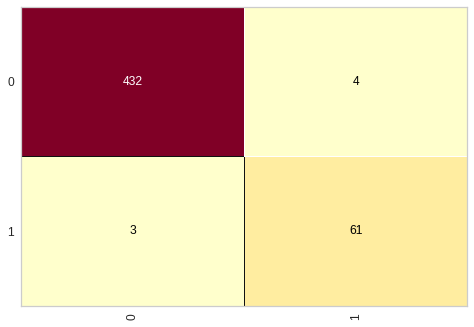

In [197]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [198]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



### Base Census - 82.28%

In [199]:
with open("census.pkl", "rb") as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [200]:
knn_census = KNeighborsClassifier(n_neighbors = 5)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [201]:
previsoes = knn_census.predict(X_census_teste)

In [202]:
accuracy_score(y_census_teste, previsoes)

0.8228177926670389

0.8228177926670389

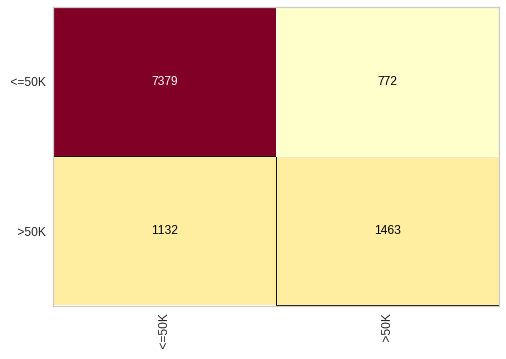

In [203]:
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

## Logistic Regression